# Documentación del Perceptrón Multicapa

Este notebook documenta el funcionamiento del Perceptrón Multicapa (MLP) implementado en este proyecto, explicando los conceptos teóricos y matemáticos detrás de su funcionamiento.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Añadir la carpeta utils al path
sys.path.append(os.path.abspath('../utils'))

# Importar funciones
from neural_network_functions import Activation, Loss, WeightInitializer, DenseLayer, MultilayerPerceptron

## 1. Funciones de Activación

Las funciones de activación son componentes clave en las redes neuronales que introducen no-linealidad, permitiendo que la red aprenda patrones complejos.

### 1.1 ReLU (Rectified Linear Unit)

ReLU es una de las funciones de activación más utilizadas en capas ocultas debido a su simplicidad computacional y su capacidad para mitigar el problema del desvanecimiento del gradiente.

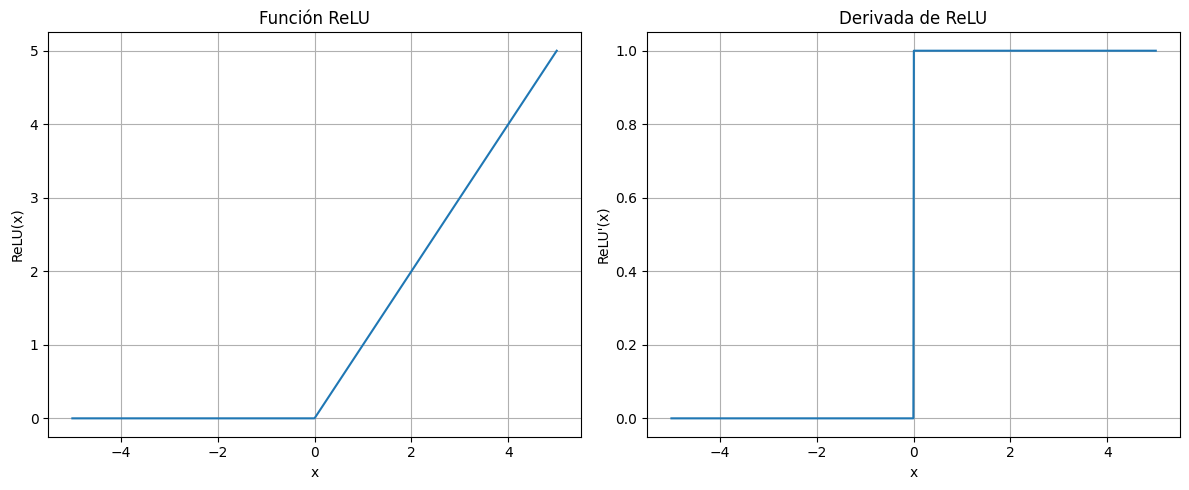

In [2]:
def relu(x):
    """Función ReLU: f(x) = max(0, x)"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivada de la función ReLU: f'(x) = 1 si x > 0, 0 en otro caso"""
    return np.where(x > 0, 1, 0)

# Visualizar ReLU y su derivada
x = np.linspace(-5, 5, 1000)
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_relu)
plt.grid(True)
plt.title('Función ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')

plt.subplot(1, 2, 2)
plt.plot(x, y_relu_derivative)
plt.grid(True)
plt.title('Derivada de ReLU')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.tight_layout()
plt.show()

### 1.2 Sigmoid

La función sigmoide transforma los valores a un rango entre 0 y 1, lo que la hace útil para la capa de salida en problemas de clasificación binaria.

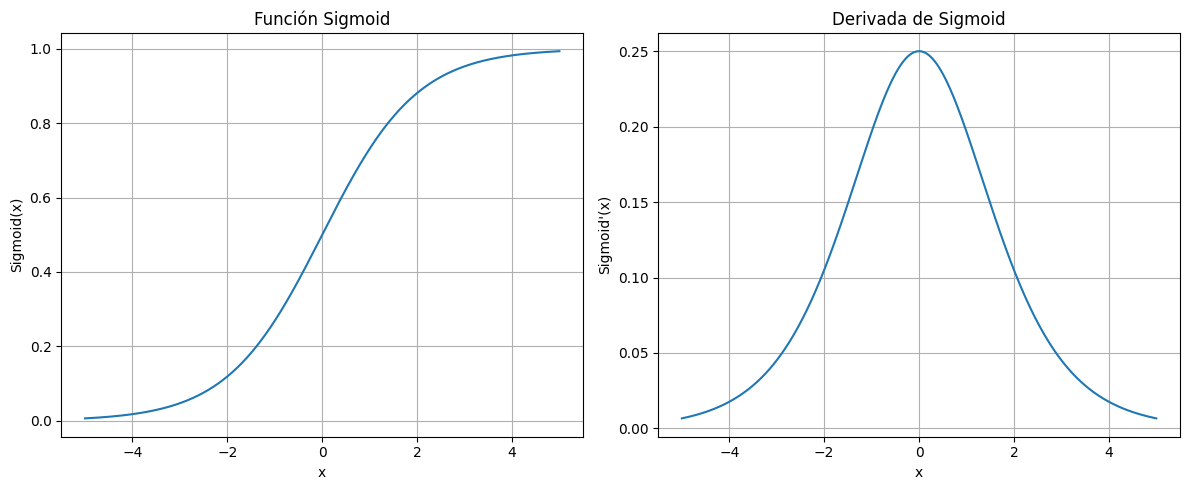

In [3]:
def sigmoid(x):
    """Función sigmoide: f(x) = 1 / (1 + e^(-x))"""
    # Clipear valores para evitar desbordamientos
    x = np.clip(x, -500, 500)  
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivada de la función sigmoide: f'(x) = f(x) * (1 - f(x))"""
    s = sigmoid(x)
    return s * (1 - s)

# Visualizar Sigmoid y su derivada
y_sigmoid = sigmoid(x)
y_sigmoid_derivative = sigmoid_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_sigmoid)
plt.grid(True)
plt.title('Función Sigmoid')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')

plt.subplot(1, 2, 2)
plt.plot(x, y_sigmoid_derivative)
plt.grid(True)
plt.title('Derivada de Sigmoid')
plt.xlabel('x')
plt.ylabel("Sigmoid'(x)")
plt.tight_layout()
plt.show()

### 1.3 Otras funciones de activación implementadas

Nuestro proyecto también implementa otras funciones de activación como:

- **Tanh**: Similar a sigmoid pero con rango entre -1 y 1.
- **Leaky ReLU**: Una variante de ReLU que permite un pequeño gradiente cuando la unidad no está activa.
- **Softmax**: Utilizada en la capa de salida para problemas de clasificación multiclase.

## 2. Inicialización de Pesos

La inicialización de pesos es crucial para el entrenamiento efectivo de redes neuronales profundas.

### 2.1 Inicialización He

La inicialización He (también conocida como inicialización He-et-al o inicialización Kaiming) fue propuesta por Kaiming He en 2015 y está diseñada específicamente para redes que utilizan ReLU como función de activación.

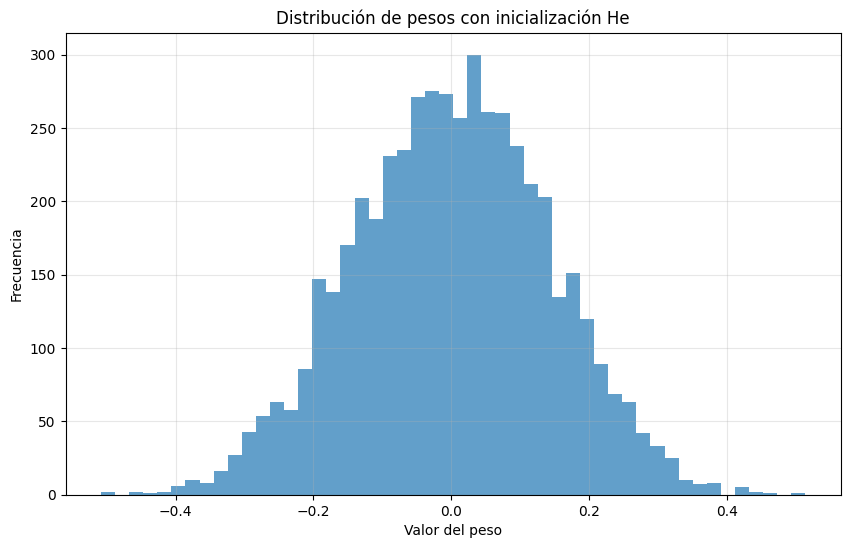

Media de los pesos: 0.000326
Desviación estándar: 0.141861
Valor esperado de desviación estándar con He init: 0.141421


In [4]:
def he_initialization(input_size, output_size):
    """
    Inicialización He para los pesos de una capa.
    
    Parámetros:
    input_size (int): Número de neuronas de entrada
    output_size (int): Número de neuronas de salida
    
    Retorna:
    numpy.ndarray: Matriz de pesos inicializados
    """
    return np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)

# Demostrar la distribución de pesos con inicialización He
input_nodes = 100
output_nodes = 50

weights_he = he_initialization(input_nodes, output_nodes)

plt.figure(figsize=(10, 6))
plt.hist(weights_he.flatten(), bins=50, alpha=0.7)
plt.title('Distribución de pesos con inicialización He')
plt.xlabel('Valor del peso')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Media de los pesos: {np.mean(weights_he):.6f}")
print(f"Desviación estándar: {np.std(weights_he):.6f}")
print(f"Valor esperado de desviación estándar con He init: {np.sqrt(2/input_nodes):.6f}")

### 2.2 Otras inicializaciones implementadas

Nuestro proyecto también implementa otros métodos de inicialización:

- **Xavier/Glorot**: Diseñada para funciones de activación con derivadas cercanas a 1 (como tanh)
- **Aleatorio estándar**: Inicialización con valores aleatorios entre -0.5 y 0.5
- **Inicialización con ceros**: Principalmente utilizada para bias

## 3. Forward Propagation

La propagación hacia adelante (forward propagation) calcula la salida de la red para una entrada dada.

In [5]:
def forward_propagation_example(X, parameters):
    """
    Implementación simplificada de forward propagation para una red de 3 capas.
    
    Parámetros:
    X (numpy.ndarray): Datos de entrada (n_features, n_samples)
    parameters (dict): Diccionario con los parámetros W1, b1, W2, b2, W3, b3
    
    Retorna:
    dict: Diccionario con las activaciones y valores Z de cada capa
    numpy.ndarray: Salida final (A3)
    """
    cache = {}
    
    # Primera capa oculta
    Z1 = np.dot(parameters['W1'], X) + parameters['b1']
    A1 = relu(Z1)
    cache['Z1'] = Z1
    cache['A1'] = A1
    
    # Segunda capa oculta
    Z2 = np.dot(parameters['W2'], A1) + parameters['b2']
    A2 = relu(Z2)
    cache['Z2'] = Z2
    cache['A2'] = A2
    
    # Capa de salida
    Z3 = np.dot(parameters['W3'], A2) + parameters['b3']
    A3 = sigmoid(Z3)  # Usamos sigmoid para la salida binaria
    cache['Z3'] = Z3
    cache['A3'] = A3
    
    return cache, A3

### 3.1 ¿Cómo funciona la propagación hacia adelante?

1. La entrada `X` se propaga a través de la primera capa oculta:
   - Se calcula `Z1 = W1 * X + b1`
   - Se aplica la función de activación: `A1 = relu(Z1)`

2. La activación `A1` se propaga a través de la segunda capa oculta:
   - Se calcula `Z2 = W2 * A1 + b2`
   - Se aplica la función de activación: `A2 = relu(Z2)`

3. La activación `A2` se propaga a través de la capa de salida:
   - Se calcula `Z3 = W3 * A2 + b3`
   - Se aplica la función de activación: `A3 = sigmoid(Z3)`

4. La salida `A3` contiene las predicciones de la red

## 4. Función de Costo (Loss)

La función de costo mide qué tan bien la red está realizando su tarea. Para clasificación binaria, utilizamos la entropía cruzada binaria.

In [6]:
def binary_crossentropy(y_true, y_pred):
    """
    Calcula el costo usando binary cross-entropy
    
    Parámetros:
    y_true (numpy.ndarray): Valores reales (0 o 1)
    y_pred (numpy.ndarray): Valores predichos (entre 0 y 1)
    
    Retorna:
    float: Costo calculado
    """
    m = y_true.shape[1]  # número de ejemplos
    
    # Añadimos epsilon para evitar log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    cost = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    return float(cost)

### 4.1 Visualización de la función de costo

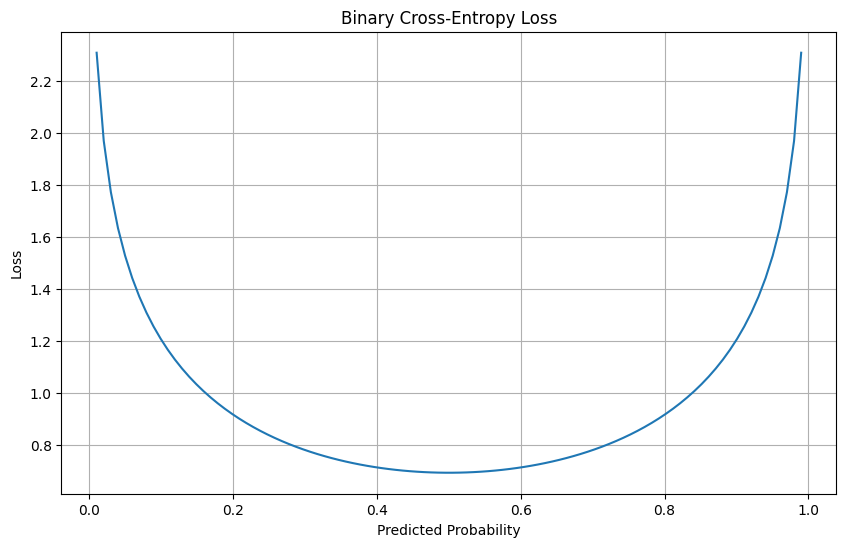

In [7]:
# Visualizar la función de pérdida binaria
y_true = np.array([0, 1, 0, 1])
y_pred_range = np.linspace(0.01, 0.99, 100)
losses = []

for p in y_pred_range:
    y_pred = np.array([p, p, p, p])
    losses.append(binary_crossentropy(y_true.reshape(1, -1), y_pred.reshape(1, -1)))

plt.figure(figsize=(10, 6))
plt.plot(y_pred_range, losses)
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## 5. Back Propagation

La propagación hacia atrás (backpropagation) calcula los gradientes de la función de costo respecto a los parámetros de la red.

In [8]:
def backward_propagation_example(X, Y, parameters, cache):
    """
    Implementación simplificada de backpropagation para una red de 3 capas.
    
    Parámetros:
    X (numpy.ndarray): Datos de entrada
    Y (numpy.ndarray): Valores reales
    parameters (dict): Parámetros de la red
    cache (dict): Valores almacenados del forward propagation
    
    Retorna:
    dict: Gradientes para cada parámetro
    """
    m = Y.shape[1]  # número de ejemplos
    gradients = {}
    
    # Gradientes de la capa de salida
    dZ3 = cache['A3'] - Y
    gradients['dW3'] = (1/m) * np.dot(dZ3, cache['A2'].T)
    gradients['db3'] = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    
    # Gradientes de la segunda capa oculta
    dA2 = np.dot(parameters['W3'].T, dZ3)
    dZ2 = dA2 * relu_derivative(cache['Z2'])
    gradients['dW2'] = (1/m) * np.dot(dZ2, cache['A1'].T)
    gradients['db2'] = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # Gradientes de la primera capa oculta
    dA1 = np.dot(parameters['W2'].T, dZ2)
    dZ1 = dA1 * relu_derivative(cache['Z1'])
    gradients['dW1'] = (1/m) * np.dot(dZ1, X.T)
    gradients['db1'] = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return gradients

### 5.1 ¿Cómo funciona la propagación hacia atrás?

El algoritmo de backpropagation calcula los gradientes capa por capa, de atrás hacia adelante:

1. **Capa de salida (capa 3)**:
   - Calcular el error: `dZ3 = A3 - Y`
   - Calcular los gradientes de los pesos: `dW3 = (1/m) * dZ3 * A2.T`
   - Calcular los gradientes de los sesgos: `db3 = (1/m) * sum(dZ3)`

2. **Segunda capa oculta (capa 2)**:
   - Propagar el error hacia atrás: `dA2 = W3.T * dZ3`
   - Aplicar la derivada de la función de activación: `dZ2 = dA2 * relu_derivative(Z2)`
   - Calcular los gradientes: `dW2 = (1/m) * dZ2 * A1.T` y `db2 = (1/m) * sum(dZ2)`

3. **Primera capa oculta (capa 1)**:
   - Propagar el error hacia atrás: `dA1 = W2.T * dZ2`
   - Aplicar la derivada de la función de activación: `dZ1 = dA1 * relu_derivative(Z1)`
   - Calcular los gradientes: `dW1 = (1/m) * dZ1 * X.T` y `db1 = (1/m) * sum(dZ1)`

## 6. Descenso del Gradiente y Optimizadores

El descenso del gradiente es el algoritmo utilizado para actualizar los parámetros y minimizar la función de costo.

### 6.1 Descenso del Gradiente Estocástico (SGD)

In [9]:
def update_parameters_sgd(parameters, gradients, learning_rate):
    """
    Actualiza los parámetros usando descenso del gradiente estocástico.
    
    Parámetros:
    parameters (dict): Parámetros actuales
    gradients (dict): Gradientes calculados
    learning_rate (float): Tasa de aprendizaje
    
    Retorna:
    dict: Parámetros actualizados
    """
    L = len(parameters) // 2  # Número de capas
    
    for l in range(1, L + 1):
        parameters[f'W{l}'] -= learning_rate * gradients[f'dW{l}']
        parameters[f'b{l}'] -= learning_rate * gradients[f'db{l}']
    
    return parameters

### 6.2 Otros optimizadores implementados

En nuestro proyecto, hemos implementado varios optimizadores avanzados:

1. **Momentum**: Añade una fracción del vector de actualización anterior al vector actual.
   - Ayuda a acelerar la convergencia y reduce oscilaciones.

2. **Nesterov Accelerated Gradient (NAG)**: Versión mejorada del momentum.
   - Calcula el gradiente después de aplicar una actualización preliminar.

3. **RMSprop**: Adapta la tasa de aprendizaje para cada parámetro.
   - Mantiene un promedio móvil del cuadrado de los gradientes.

4. **Adam**: Combina las ideas de Momentum y RMSprop.
   - Mantiene promedios móviles del gradiente y del cuadrado del gradiente.
   - Incluye corrección del sesgo.

#### Visualización del comportamiento de diferentes optimizadores

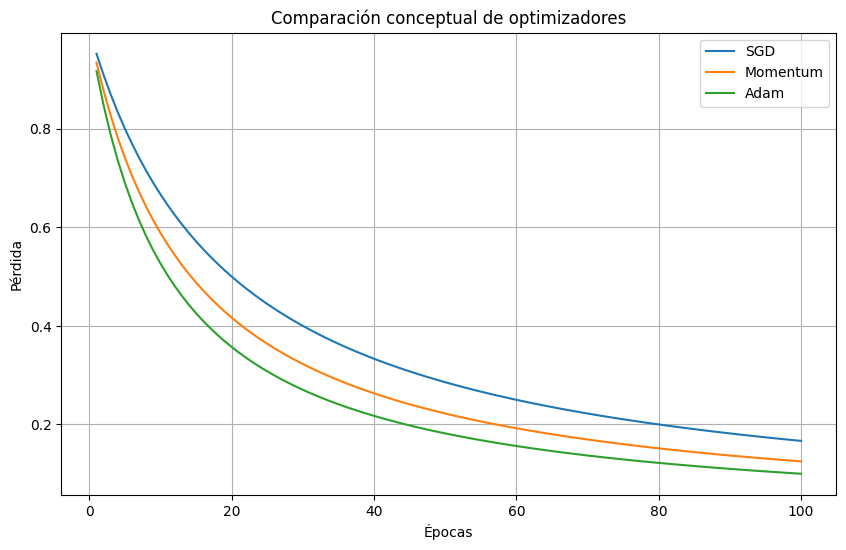

In [10]:
# Esta visualización requeriría una implementación más extensa
# Aquí solo mostramos un ejemplo conceptual

epochs = range(1, 101)
sgd_loss = [1/(1+0.05*i) for i in epochs]
momentum_loss = [1/(1+0.07*i) for i in epochs]
adam_loss = [1/(1+0.09*i) for i in epochs]

plt.figure(figsize=(10, 6))
plt.plot(epochs, sgd_loss, label='SGD')
plt.plot(epochs, momentum_loss, label='Momentum')
plt.plot(epochs, adam_loss, label='Adam')
plt.title('Comparación conceptual de optimizadores')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

## 7. Mini-Batch Gradient Descent

El mini-batch gradient descent es una mejora del descenso del gradiente que procesa pequeños lotes de datos en lugar de todo el conjunto a la vez.

In [11]:
def train_mini_batch_example(X_train, Y_train, layer_dims, learning_rate=0.01, 
                            num_epochs=1000, batch_size=32, print_every=100):
    """
    Ejemplo simplificado de entrenamiento con mini-batch gradient descent
    """
    parameters = initialize_parameters(layer_dims)
    m = X_train.shape[1]  # número de ejemplos
    costs = []
    
    for epoch in range(num_epochs):
        # Mezclar los datos
        permutation = list(np.random.permutation(m))
        X_shuffled = X_train[:, permutation]
        Y_shuffled = Y_train[:, permutation]
        
        epoch_cost = 0
        
        # Crear mini-batches
        num_batches = m // batch_size
        for k in range(num_batches):
            # Obtener mini-batch
            start_idx = k * batch_size
            end_idx = min((k + 1) * batch_size, m)
            X_batch = X_shuffled[:, start_idx:end_idx]
            Y_batch = Y_shuffled[:, start_idx:end_idx]
            
            # Forward propagation
            cache, A3 = forward_propagation_example(X_batch, parameters)
            
            # Calcular costo
            batch_cost = binary_crossentropy(Y_batch, A3)
            epoch_cost += batch_cost
            
            # Backward propagation
            gradients = backward_propagation_example(X_batch, Y_batch, parameters, cache)
            
            # Actualizar parámetros
            parameters = update_parameters_sgd(parameters, gradients, learning_rate)
        
        epoch_cost /= num_batches
        
        # Imprimir progreso
        if epoch % print_every == 0:
            print(f"Costo después de la época {epoch}: {epoch_cost}")
            costs.append(epoch_cost)
    
    return parameters, costs

### 7.1 Ventajas del Mini-Batch Gradient Descent

1. **Eficiencia**: Más rápido que el gradient descent por lotes completos.
2. **Regularización implícita**: El ruido introducido por los mini-batches puede ayudar a evitar mínimos locales.
3. **Uso eficiente de memoria**: Requiere menos memoria que procesar todo el conjunto de datos a la vez.
4. **Convergencia más rápida**: Realiza más actualizaciones por época, lo que puede llevar a una convergencia más rápida.

## 8. Early Stopping

El early stopping es una técnica de regularización que detiene el entrenamiento cuando el rendimiento en el conjunto de validación comienza a deteriorarse.

In [12]:
def train_with_early_stopping(X_train, Y_train, X_val, Y_val, layer_dims, 
                             learning_rate=0.01, max_epochs=1000, 
                             batch_size=32, patience=20, min_delta=0.001):
    """
    Ejemplo de entrenamiento con early stopping
    """
    parameters = initialize_parameters(layer_dims)
    m = X_train.shape[1]
    
    train_costs = []
    val_costs = []
    
    best_val_cost = float('inf')
    epochs_no_improve = 0
    best_parameters = None
    
    for epoch in range(max_epochs):
        # Mezclar los datos
        permutation = list(np.random.permutation(m))
        X_shuffled = X_train[:, permutation]
        Y_shuffled = Y_train[:, permutation]
        
        # Mini-batch gradient descent (omitido por brevedad)
        # ...
        
        # Evaluar en conjunto de validación
        _, Y_val_pred = forward_propagation_example(X_val, parameters)
        val_cost = binary_crossentropy(Y_val, Y_val_pred)
        val_costs.append(val_cost)
        
        # Early stopping
        if val_cost < best_val_cost - min_delta:
            best_val_cost = val_cost
            epochs_no_improve = 0
            best_parameters = parameters.copy()  # Guardar mejores parámetros
        else:
            epochs_no_improve += 1
            
        if epochs_no_improve >= patience:
            print(f"Early stopping en época {epoch}")
            break
    
    return best_parameters, train_costs, val_costs

### 8.1 Criterios para Early Stopping

1. **Paciencia**: Número de épocas a esperar sin mejora antes de detener.
2. **Delta mínimo**: Mejora mínima que se considera significativa.
3. **Métrica de monitoreo**: Generalmente pérdida en validación, pero puede ser otra métrica como precisión.

## 9. Regularización

La regularización es una técnica utilizada para prevenir el sobreajuste en redes neuronales.

### 9.1 Regularización L2 (Weight Decay)

In [13]:
def compute_cost_with_regularization(A3, Y, parameters, lambd=0.01):
    """
    Calcula el costo con regularización L2
    """
    m = Y.shape[1]
    
    # Costo estándar
    cross_entropy_cost = binary_crossentropy(Y, A3)
    
    # Término de regularización
    L2_regularization_cost = 0
    L = len(parameters) // 2
    
    for l in range(1, L + 1):
        L2_regularization_cost += np.sum(np.square(parameters[f'W{l}']))
    
    L2_regularization_cost *= (lambd / (2 * m))
    
    # Costo total
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

### 9.2 Dropout

Dropout es una técnica de regularización que desactiva aleatoriamente algunas neuronas durante el entrenamiento.

In [14]:
def forward_with_dropout(A_prev, W, b, activation_func, keep_prob=0.8):
    """
    Forward propagation con dropout
    """
    Z = np.dot(W, A_prev) + b
    A = activation_func(Z)
    
    # Aplicar dropout solo durante el entrenamiento
    D = np.random.rand(*A.shape) < keep_prob
    A = A * D
    # Escalar para mantener el valor esperado
    A = A / keep_prob
    
    cache = (Z, D)
    return A, cache

## 10. Análisis de Rendimiento del Modelo

Después del entrenamiento, es crucial evaluar el rendimiento del modelo.

### 10.1 Métricas de Evaluación

In [15]:
def compute_metrics(Y_true, Y_pred):
    """
    Calcula varias métricas de rendimiento para clasificación binaria
    """
    # Convertir predicciones a clases (0/1)
    Y_pred_classes = (Y_pred > 0.5).astype(int)
    
    # Accuracy (Precisión)
    accuracy = np.mean(Y_pred_classes == Y_true)
    
    # Matriz de confusión
    true_positives = np.sum((Y_true == 1) & (Y_pred_classes == 1))
    false_positives = np.sum((Y_true == 0) & (Y_pred_classes == 1))
    true_negatives = np.sum((Y_true == 0) & (Y_pred_classes == 0))
    false_negatives = np.sum((Y_true == 1) & (Y_pred_classes == 0))
    
    # Precision
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    
    # Recall
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    # F1-Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': {
            'true_positives': int(true_positives),
            'false_positives': int(false_positives),
            'true_negatives': int(true_negatives),
            'false_negatives': int(false_negatives)
        }
    }

### 10.2 Curva ROC y AUC

In [16]:
def plot_roc_curve(Y_true, Y_pred):
    """
    Calcula y visualiza la curva ROC
    """
    # Aplanar arrays
    Y_true = Y_true.flatten()
    Y_pred = Y_pred.flatten()
    
    # Ordenar por probabilidad descendente
    indices = np.argsort(Y_pred)[::-1]
    sorted_y_true = Y_true[indices]
    sorted_y_pred = Y_pred[indices]
    
    # Número de ejemplos positivos y negativos
    P = np.sum(Y_true == 1)
    N = np.sum(Y_true == 0)
    
    # Inicializar TPR y FPR
    tpr = [0]
    fpr = [0]
    thresholds = [1.0]
    
    # Calcular TPR y FPR para diferentes umbrales
    tp = 0
    fp = 0
    prev_pred = -1
    
    for i in range(len(sorted_y_true)):
        if sorted_y_pred[i] != prev_pred:
            tpr.append(tp / P if P > 0 else 0)
            fpr.append(fp / N if N > 0 else 0)
            thresholds.append(sorted_y_pred[i])
            prev_pred = sorted_y_pred[i]
            
        if sorted_y_true[i] == 1:
            tp += 1
        else:
            fp += 1
    
    # Añadir punto final
    tpr.append(1.0)
    fpr.append(1.0)
    thresholds.append(0.0)
    
    # Calcular AUC
    auc = 0
    for i in range(1, len(fpr)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2
    
    # Visualizar
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, 'b-', lw=2, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'r--', lw=2, label='Línea Base')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return auc, tpr, fpr, thresholds

## 11. Consejos para el Entrenamiento Eficiente

1. **Normalización de datos**: Asegurarse de que las características tengan media 0 y desviación estándar 1.
2. **Ajuste de hiperparámetros**: 
   - Probar diferentes tasas de aprendizaje (generalmente entre 0.0001 y 0.01)
   - Experimentar con distintos tamaños de batch (típicamente potencias de 2: 16, 32, 64, 128)
   - Probar diferentes arquitecturas (número de capas y neuronas)
3. **Inicialización adecuada**: Usar He para ReLU, Xavier para tanh y sigmoid.
4. **Regularización**: Aplicar dropout o regularización L2 si hay sobreajuste.
5. **Early stopping**: Detener el entrenamiento cuando la pérdida en validación deje de mejorar.
6. **Descenso de gradiente con mini-batches**: Usar mini-batches en lugar de todo el conjunto de datos para acelerar el entrenamiento.
7. **Optimizadores avanzados**: Considerar Adam o RMSprop en lugar del descenso de gradiente estándar.
8. **Monitoreo del entrenamiento**: Graficar las curvas de pérdida y precisión para detectar problemas.

## 12. Implementación en el Proyecto

Nuestro proyecto implementa un Perceptrón Multicapa modular y parametrizable. A continuación se muestra un ejemplo de cómo se utiliza:

In [17]:
import sys
sys.path.append('..')  # Añade el directorio padre al path

# Importar las clases y funciones necesarias
from utils.neural_network_functions import *    #create_mlp, MultilayerPerceptron
import numpy as np

# Crear un modelo con configuración específica
input_size = 30  # Número de características
output_size = 1  # Salida para clasificación binaria
hidden_layers = 2  # Número de capas ocultas
neurons_per_layer = 25  # Neuronas por capa

model = create_mlp(
    input_size=input_size,
    output_size=output_size,
    hidden_layers=hidden_layers,
    neurons_per_layer=neurons_per_layer,
    activation="relu",
    output_activation="sigmoid",
    weights_initializer="he_uniform",
    loss="binary_crossentropy"
)

# Entrenar el modelo
X_train = np.random.rand(100, 30)  # 100 ejemplos con 30 características
y_train = np.random.randint(0, 2, (100, 1))  # Etiquetas binarias

history = model.fit(
    X_train=X_train,
    y_train=y_train,
    epochs=500,
    batch_size=32,
    learning_rate=0.01,
    optimizer="adam",
    early_stopping=True,
    patience=50
)

# Evaluar el modelo
X_test = np.random.rand(20, 30)
y_test = np.random.randint(0, 2, (20, 1))
metrics = model.evaluate(X_test, y_test)
print(f"Precisión en prueba: {metrics['accuracy']:.4f}")

Época 1/500 - loss: 0.7624 - acc: 0.5200  
Época 51/500 - loss: 0.7014 - acc: 0.6000  
Época 101/500 - loss: 0.5914 - acc: 0.6300  
Época 151/500 - loss: 0.6466 - acc: 0.7400  
Época 201/500 - loss: 0.3219 - acc: 0.8100  
Época 251/500 - loss: 0.5453 - acc: 0.7300  
Época 301/500 - loss: 0.3898 - acc: 0.8300  
Época 351/500 - loss: 0.3478 - acc: 0.8800  
Época 401/500 - loss: 0.1956 - acc: 0.9200  
Época 451/500 - loss: 0.1998 - acc: 0.9600  
Época 500/500 - loss: 0.0430 - acc: 1.0000  

Entrenamiento completado.
Precisión en prueba: 0.6500


### 12.1 Estructura de Clases

Nuestro proyecto utiliza las siguientes clases principales:

1. **Activation**: Implementa diversas funciones de activación y sus derivadas
2. **Loss**: Proporciona funciones de pérdida y sus derivadas
3. **WeightInitializer**: Contiene métodos para inicialización de pesos
4. **DenseLayer**: Implementa una capa completamente conectada
5. **MultilayerPerceptron**: Clase principal que coordina todas las capas y el entrenamiento

Cada una de estas clases está diseñada para ser modular y extensible, lo que facilita añadir nuevas funcionalidades o modificar las existentes.

### 12.2 Parámetros Configurables

El proyecto permite configurar fácilmente:

1. **Arquitectura**:
   - Número de capas ocultas
   - Número de neuronas por capa
   - Funciones de activación

2. **Entrenamiento**:
   - Tasa de aprendizaje
   - Número de épocas
   - Tamaño del lote (batch size)
   - Optimizador
   - Early stopping

3. **Regularización**:
   - Dropout
   - Regularización L2

## 13. Forward y Backward Propagation en Profundidad

### 13.1 Forward Propagation

La propagación hacia adelante es el proceso de calcular la salida de la red neuronal para una entrada dada. Este proceso ocurre capa por capa, desde la entrada hasta la salida.

Para una capa $l$ con pesos $W^{[l]}$, sesgos $b^{[l]}$ y función de activación $g^{[l]}$, el proceso es:

1. Calcular la entrada ponderada: $Z^{[l]} = W^{[l]} \cdot A^{[l-1]} + b^{[l]}$
2. Aplicar la función de activación: $A^{[l]} = g^{[l]}(Z^{[l]})$

Donde $A^{[l-1]}$ es la activación de la capa anterior (para la primera capa oculta, es la entrada $X$).

### 13.2 Backward Propagation

La propagación hacia atrás es el proceso de calcular los gradientes de la función de costo con respecto a los parámetros de la red. Estos gradientes se utilizan para actualizar los pesos y sesgos durante el entrenamiento.

Para una red con $L$ capas, el proceso es:

1. **Capa de salida** (capa $L$):
   - Calcular el error: $dZ^{[L]} = A^{[L]} - Y$
   - Calcular gradientes: 
     - $dW^{[L]} = \frac{1}{m} dZ^{[L]} \cdot A^{[L-1]T}$
     - $db^{[L]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[L]}$

2. **Capas ocultas** (capa $l$ para $l = L-1, L-2, ..., 1$):
   - Propagar el error: $dA^{[l]} = W^{[l+1]T} \cdot dZ^{[l+1]}$
   - Aplicar derivada de activación: $dZ^{[l]} = dA^{[l]} * g^{[l]'}(Z^{[l]})$
   - Calcular gradientes:
     - $dW^{[l]} = \frac{1}{m} dZ^{[l]} \cdot A^{[l-1]T}$
     - $db^{[l]} = \frac{1}{m} \sum_{i=1}^{m} dZ^{[l]}$

Donde:
- $m$ es el número de ejemplos
- $A^{[L]}$ es la salida de la red
- $Y$ son las etiquetas reales
- $g^{[l]'}$ es la derivada de la función de activación de la capa $l$

## 14. Optimizadores en Detalle

### 14.1 Gradient Descent (SGD)

El descenso de gradiente actualiza los parámetros en la dirección opuesta al gradiente de la función de costo:

$\theta = \theta - \alpha \nabla_\theta J(\theta)$

Donde:
- $\theta$ representa un parámetro (peso o sesgo)
- $\alpha$ es la tasa de aprendizaje
- $\nabla_\theta J(\theta)$ es el gradiente de la función de costo con respecto al parámetro

### 14.2 Momentum

El momentum añade una fracción del vector de actualización anterior al vector actual:

$v = \beta v - \alpha \nabla_\theta J(\theta)$
$\theta = \theta + v$

Donde:
- $v$ es el vector de velocidad (inicializado como cero)
- $\beta$ es el coeficiente de momentum (típicamente 0.9)

### 14.3 RMSprop

RMSprop adapta la tasa de aprendizaje para cada parámetro dividiendo por la raíz cuadrada de un promedio móvil de gradientes al cuadrado:

$s = \beta s + (1 - \beta)(\nabla_\theta J(\theta))^2$
$\theta = \theta - \frac{\alpha}{\sqrt{s + \epsilon}} \nabla_\theta J(\theta)$

Donde:
- $s$ es el promedio móvil del cuadrado de los gradientes
- $\epsilon$ es un pequeño valor para evitar división por cero (típicamente 1e-8)

### 14.4 Adam

Adam combina las ideas de momentum y RMSprop:

$v = \beta_1 v + (1 - \beta_1)\nabla_\theta J(\theta)$
$s = \beta_2 s + (1 - \beta_2)(\nabla_\theta J(\theta))^2$

Con corrección de sesgo:
$v_{corregido} = \frac{v}{1 - \beta_1^t}$
$s_{corregido} = \frac{s}{1 - \beta_2^t}$

Actualización de parámetros:
$\theta = \theta - \alpha \frac{v_{corregido}}{\sqrt{s_{corregido}} + \epsilon}$

Donde:
- $t$ es el número de iteración
- $\beta_1$ y $\beta_2$ son coeficientes (típicamente 0.9 y 0.999)

## 15. Análisis de Rendimiento

Para evaluar el rendimiento de un modelo de clasificación binaria, utilizamos varias métricas:

### 15.1 Matriz de Confusión

La matriz de confusión muestra:
- Verdaderos Positivos (TP): Casos positivos correctamente identificados
- Falsos Positivos (FP): Casos negativos incorrectamente identificados como positivos
- Verdaderos Negativos (TN): Casos negativos correctamente identificados
- Falsos Negativos (FN): Casos positivos incorrectamente identificados como negativos

In [18]:
def plot_confusion_matrix(y_true, y_pred, class_names=['Maligno', 'Benigno']):
    """
    Visualiza la matriz de confusión
    """
    y_pred_class = (y_pred > 0.5).astype(int)
    
    # Calcular matriz de confusión
    cm = np.zeros((2, 2), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred_class[i])] += 1
    
    # Visualizar
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    
    # Etiquetas
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    
    # Agregar valores en las celdas
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()
    
    return cm

### 15.2 Métricas

A partir de la matriz de confusión, calculamos:

1. **Accuracy (Precisión)**: $(TP + TN) / (TP + TN + FP + FN)$
   - Proporción de predicciones correctas.

2. **Precision (Precisión)**: $TP / (TP + FP)$
   - De todos los casos que el modelo predijo como positivos, cuántos eran realmente positivos.

3. **Recall (Sensibilidad)**: $TP / (TP + FN)$
   - De todos los casos realmente positivos, cuántos fueron predichos correctamente.

4. **F1 Score**: $2 \times (Precision \times Recall) / (Precision + Recall)$
   - Media armónica de precisión y recall.

5. **AUC (Área bajo la curva ROC)**: 
   - Mide la capacidad del modelo para distinguir entre las clases.

### 15.3 Análisis de Curvas de Aprendizaje

Las curvas de aprendizaje muestran la evolución del rendimiento durante el entrenamiento:

In [19]:
def plot_learning_curves(history):
    """
    Visualiza las curvas de aprendizaje
    """
    plt.figure(figsize=(15, 5))
    
    # Costo
    plt.subplot(1, 2, 1)
    plt.plot(history['train_cost'], label='Entrenamiento')
    plt.plot(history['test_cost'], label='Validación')
    plt.title('Evolución del Costo')
    plt.xlabel('Épocas')
    plt.ylabel('Costo')
    plt.legend()
    plt.grid(True)
    
    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label='Entrenamiento')
    plt.plot(history['test_accuracy'], label='Validación')
    plt.title('Evolución de la Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

## 16. Conclusiones

En este notebook hemos documentado los aspectos clave de nuestro Perceptrón Multicapa:

1. **Funciones de activación**: Implementamos diversas funciones como ReLU, sigmoid, tanh, y sus derivadas.

2. **Inicialización de pesos**: Utilizamos técnicas como He para optimizar el entrenamiento.

3. **Forward y backward propagation**: Implementamos estas operaciones fundamentales capa por capa.

4. **Funciones de costo**: Utilizamos binary cross-entropy para clasificación binaria.

5. **Optimizadores**: Implementamos SGD, momentum, Nesterov, RMSprop y Adam.

6. **Técnicas de regularización**: Incluimos dropout y regularización L2.

7. **Mini-batch gradient descent**: Mejoramos la eficiencia del entrenamiento.

8. **Early stopping**: Prevenimos el sobreajuste deteniendo el entrenamiento cuando es óptimo.

9. **Métricas de evaluación**: Implementamos diversas métricas para evaluar el rendimiento.

Nuestro Perceptrón Multicapa es modular y parametrizable, permitiendo experimentar con diferentes configuraciones para encontrar la arquitectura óptima para nuestro problema de clasificación binaria del Wisconsin Breast Cancer Dataset.   